1. Dataset Explanation and Preview
   The Real Estate Valuation dataset is a multivariate dataset designed for regression analysis. This dataset comprises historical real estate transaction data collected from the Sindian District in New Taipei City, Taiwan. Its primary purpose is to facilitate the development and evaluation of machine learning models aimed at predicting house prices based on various influencing factors. It consists of 6 key features: transaction date, House age, Distance to the nearest MRT station, Number of convenience stores within walking distance, Latitude, and Longitude.

In [147]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image

In [149]:
# Load the dataset
data = pd.read_csv('dataset.csv')

# Display what the dataset looks like
data.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


2. Bar Graph Visualization
We will categorize the houses into age groups and calculate the average price per unit area for each group. This information will then be visualized using a bar chart to facilitate comparison across different age groups.​

/var/folders/nj/1lqdrp156bb_rlh9m7ym7sdc0000gn/T/ipykernel_43006/2042069872.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avgPriceByAge = data.groupby('age_group')['Y house price of unit area'].mean()


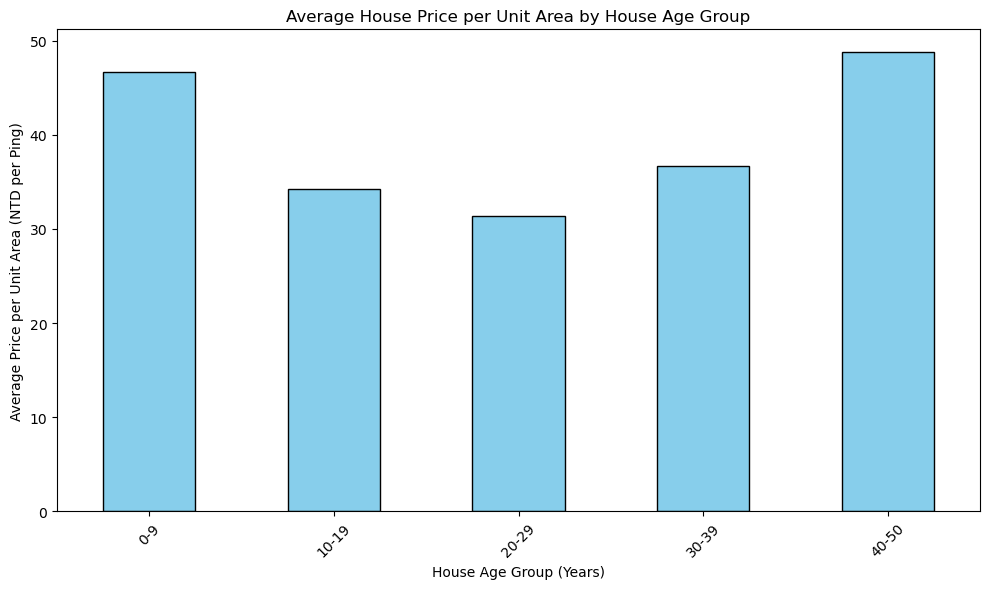

In [152]:
# Define house age bins and labels
ageBins = [0, 10, 20, 30, 40, 50]
ageLabels = ['0-9', '10-19', '20-29', '30-39', '40-50',]
data['age_group'] = pd.cut(data['X2 house age'], bins=ageBins, labels=ageLabels, right=False, include_lowest=True)

# Calculate average price per unit area for each age group
avgPriceByAge = data.groupby('age_group')['Y house price of unit area'].mean()

# Plotting
fig1 = plt.figure(figsize=(10, 6))
avgPriceByAge.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average House Price per Unit Area by House Age Group')
plt.xlabel('House Age Group (Years)')
plt.ylabel('Average Price per Unit Area (NTD per Ping)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [154]:
# Saving the Image
fig1.savefig('<Isaac + BarChart>.png')

The bar chart illustrates the average house price per unit area across different house age groups. Newer houses (e.g., 0-9 years) tend to have higher average prices per unit area, reflecting a premium for newer constructions. As the age increases, the average price per unit area tends to decrease, indicating depreciation over time until the last group (40-50 years) where the average price per unit area tends to increase. The rate of decrease may not be uniform, as other factors could influence the pricing trends.​

3. Line Graph Visualization

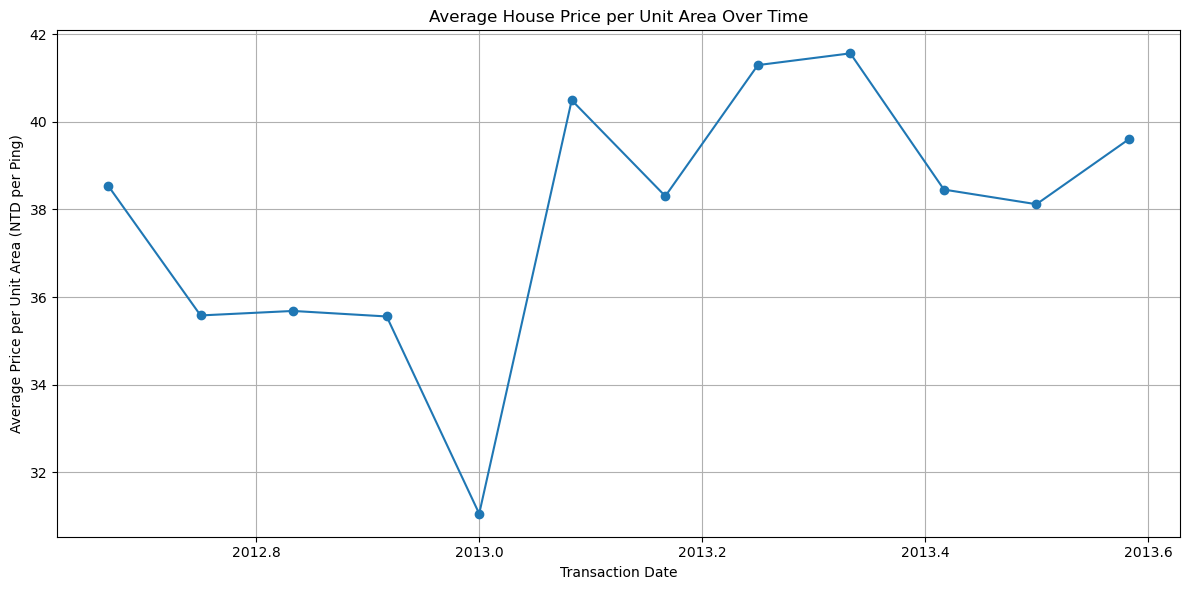

In [158]:
# Calculate the average price per unit area for each transaction date
avgPriceOverTime = data.groupby('X1 transaction date')['Y house price of unit area'].mean()

# Plotting
fig2 = plt.figure(figsize=(12, 6))
avgPriceOverTime.plot(marker='o', linestyle='-')
plt.title('Average House Price per Unit Area Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Average Price per Unit Area (NTD per Ping)')
plt.grid(True)
plt.tight_layout()
plt.show()

This line graph illustrates the trend of average house prices per unit area over different transaction dates. It helps identify how real estate prices have evolved over time in the dataset.​

In [161]:
# Saving the Image
fig2.savefig('<Isaac + LineChart>.png')

4. Pie Chart Visualization

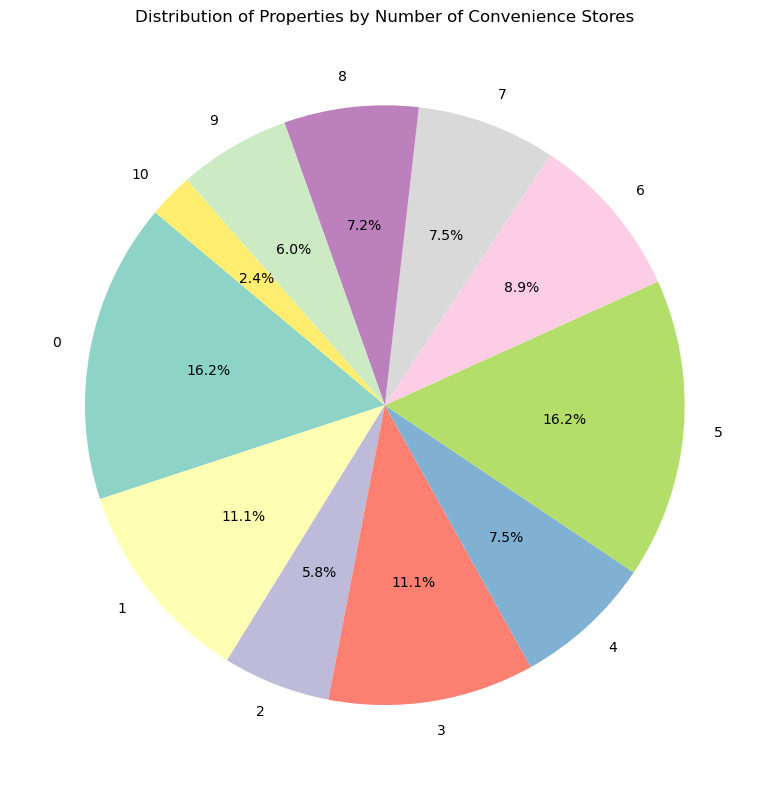

In [165]:
# Count the number of properties for each convenience store count
storeCounts = data['X4 number of convenience stores'].value_counts().sort_index()

# Plotting
fig3 = plt.figure(figsize=(8, 8))
storeCounts.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Distribution of Properties by Number of Convenience Stores')
plt.ylabel('')
plt.tight_layout()
plt.show()

This pie chart illustrates the distribution of properties based on the number of nearby convenience stores. Understanding this distribution helps in assessing how common certain levels of convenience store accessibility are among the properties in the dataset.​

In [168]:
# Saving the Image
fig3.savefig('<Isaac + PieChart>.png')

5. Box Chart Visualization

/var/folders/nj/1lqdrp156bb_rlh9m7ym7sdc0000gn/T/ipykernel_43006/1007520517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='X4 number of convenience stores', y='Y house price of unit area', data=data, palette='Set2')


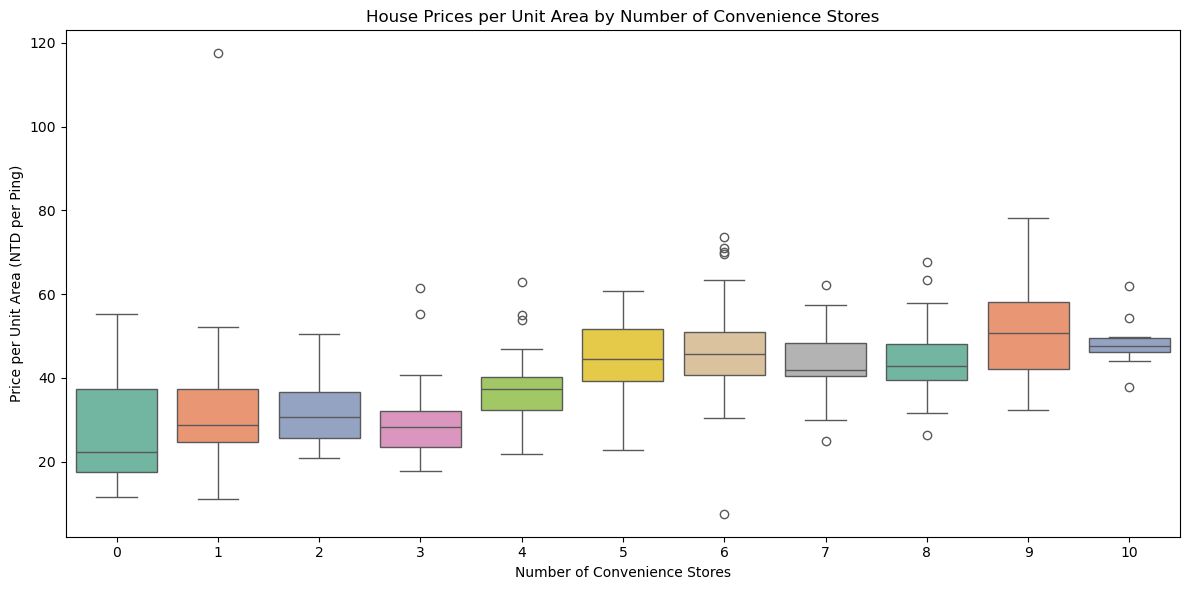

In [171]:
# Plotting
fig4 = plt.figure(figsize=(12, 6))
sns.boxplot(x='X4 number of convenience stores', y='Y house price of unit area', data=data, palette='Set2')
plt.title('House Prices per Unit Area by Number of Convenience Stores')
plt.xlabel('Number of Convenience Stores')
plt.ylabel('Price per Unit Area (NTD per Ping)')
plt.tight_layout()
plt.show()


This box plot displays the distribution of house prices per unit area across different counts of nearby convenience stores. It provides insights into how the number of convenience stores may influence property prices.​

In [174]:
# Saving the Image
fig4.savefig('<Isaac + BoxChart>.png')